In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_M13_infection")

In [8]:
tcs_metaorf = pd.read_csv("Results/Tables/Picture_source_tables/EcC3000_M13_TCS_across_metaORF_big_scale.tsv", sep="\t")
tcs_metaorf

,Dist,DistFromORFReal,DistFromORFRnd
0,0,5,4
1,1,2,1
2,2,4,0
3,3,0,1
4,4,2,1
...,...,...,...
4009,4009,0,0
4010,4010,0,0
4011,4011,0,0
4012,4012,0,0


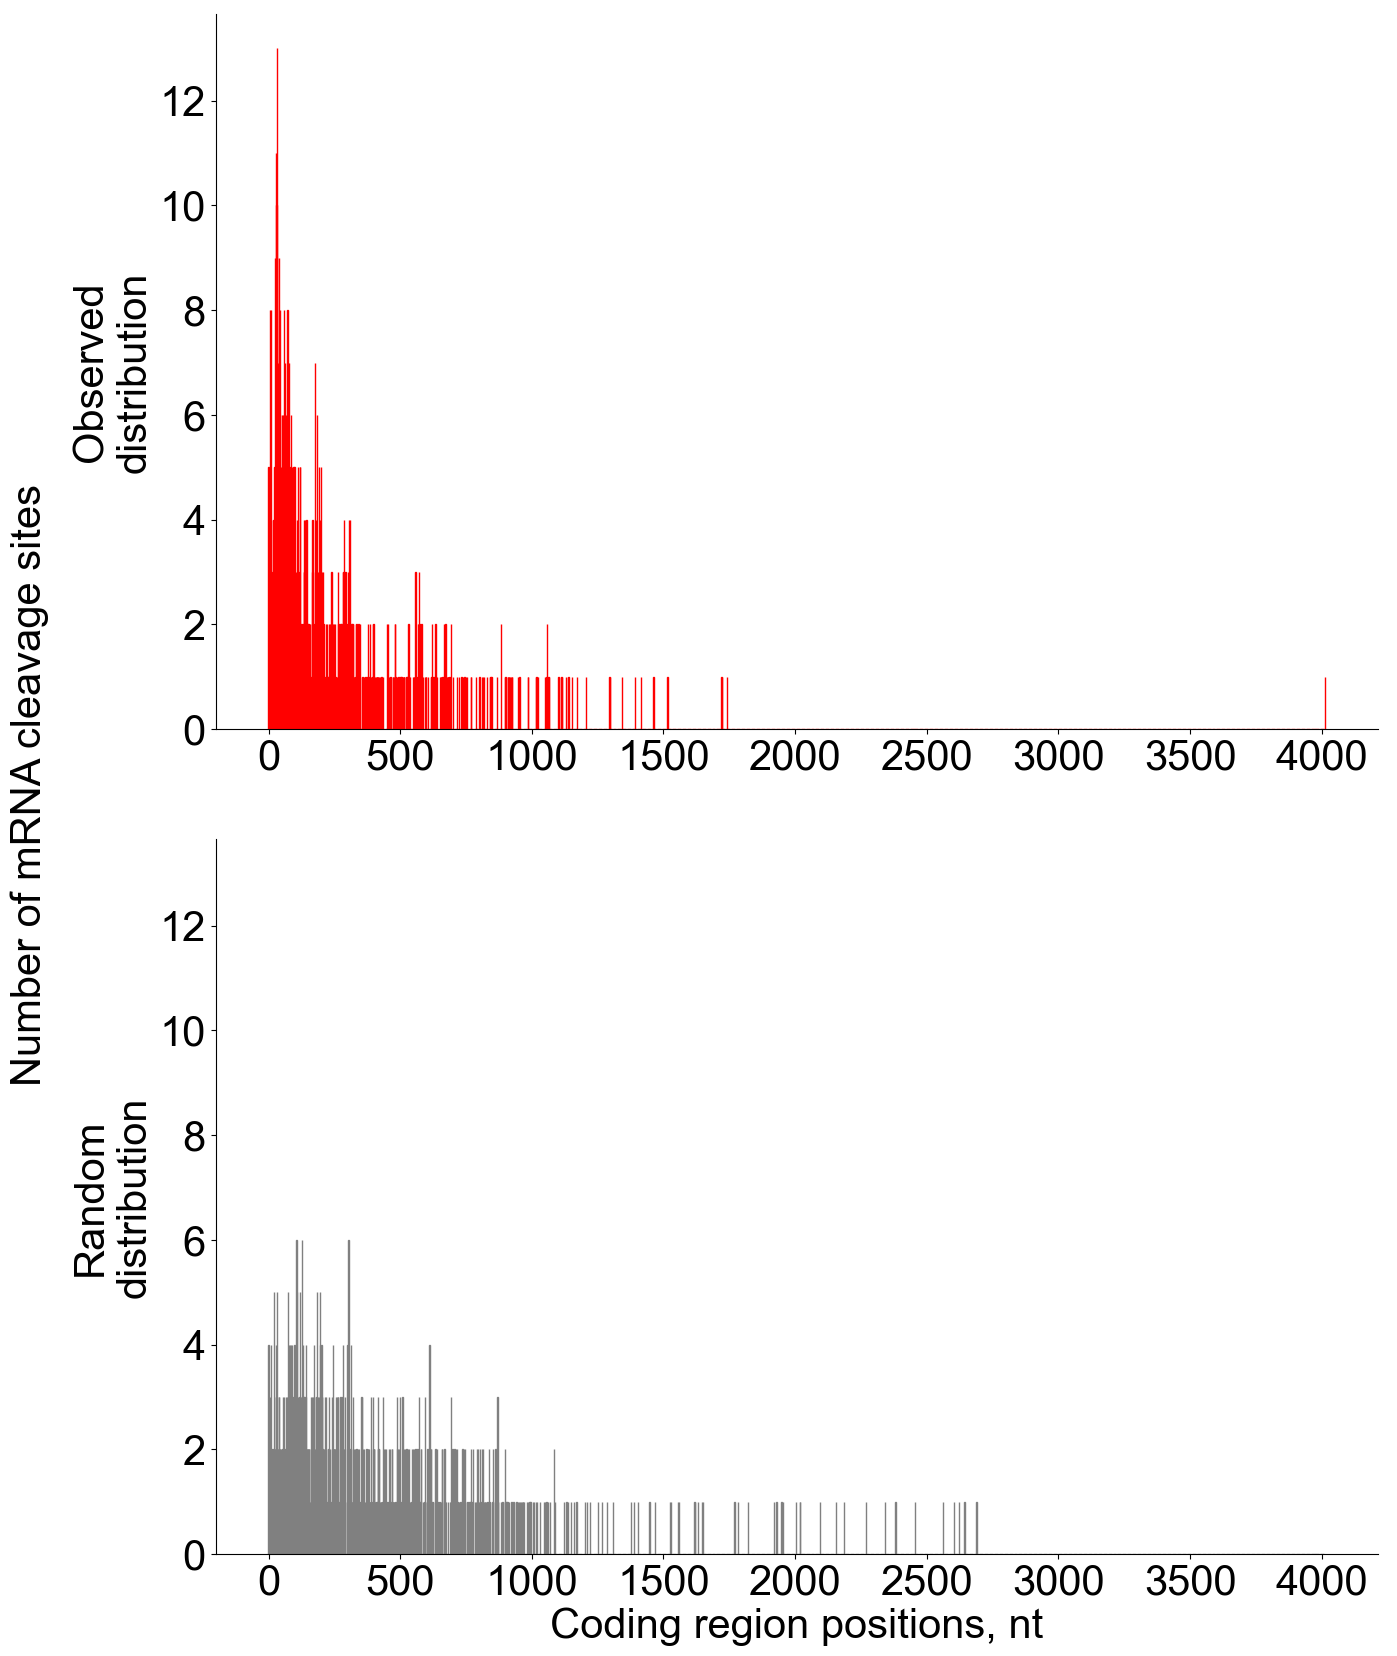

In [14]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

figure = plt.figure(figsize=(15,20))
grid = plt.GridSpec(10, 1, wspace=0.2, hspace=2)

tcs_metaorf_ylim = (0, max(tcs_metaorf["DistFromORFReal"].tolist() + 
                           tcs_metaorf["DistFromORFRnd"].tolist())*1.05)

tcs_metaorf_real_plot = figure.add_subplot(grid[0:5, 0:1])
tcs_metaorf_rand_plot = figure.add_subplot(grid[5:10, 0:1])

tcs_metaorf_real_plot.spines['top'].set_visible(False)
tcs_metaorf_real_plot.spines['right'].set_visible(False)
tcs_metaorf_rand_plot.spines['top'].set_visible(False)
tcs_metaorf_rand_plot.spines['right'].set_visible(False)

tcs_metaorf_real_plot.bar(x=tcs_metaorf["Dist"].tolist(), 
                          height=tcs_metaorf["DistFromORFReal"].tolist(), 
                          align="center", 
                          color="red", 
                          edgecolor="red", 
                          linewidth=1)
tcs_metaorf_rand_plot.bar(x=tcs_metaorf["Dist"].tolist(), 
                          height=tcs_metaorf["DistFromORFRnd"].tolist(), 
                          align="center", 
                          color="grey", 
                          edgecolor="grey", 
                          linewidth=1)

title_font_size = 30

tcs_metaorf_real_plot.set_ylim(tcs_metaorf_ylim)
tcs_metaorf_rand_plot.set_ylim(tcs_metaorf_ylim)

tcs_metaorf_real_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_real_plot.tick_params(axis="y", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="x", labelsize=title_font_size)
tcs_metaorf_rand_plot.tick_params(axis="y", labelsize=title_font_size)

tcs_metaorf_rand_plot.set_ylabel("Random\ndistribution", size=title_font_size)
tcs_metaorf_real_plot.set_ylabel("Observed\ndistribution", size=title_font_size)

tcs_metaorf_rand_plot.set_xlabel("Coding region positions, nt", size=title_font_size)

invisible_subplot_metaorf = figure.add_subplot(grid[0:10, 0:1], frameon=False)
invisible_subplot_metaorf.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
invisible_subplot_metaorf.set_ylabel("Number of mRNA cleavage sites", labelpad=80, size=title_font_size)

figure.align_labels()

In [15]:
figure.savefig("Results/Pictures/EcC3000_M13_TCS_distribution_across_mRNA", bbox_inches = "tight", dpi=300)